In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

# focus on cleaning, removing columns, and null values
# try binning, instead of elimination, if the previous doesn't work


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df = application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
counts = [len(application_df[application_df.columns[x]].value_counts()) for x in range(len(application_df.columns))]
# counts is the list comprehension of the count of each type of column
# for each column the length of each type in a column is shown
# application_df.columns[x] = name of column (innermost shell)
# application_df[].value_counts = list of value counts for a particular row
# len() gives the number of the different types of values in a column


pd.Series(index = application_df.columns,data = counts)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# application_df.nunique()

Application Type


In [5]:
application_df.APPLICATION_TYPE.value_counts()#[application_df.APPLICATION_TYPE.value_counts() > 600]

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

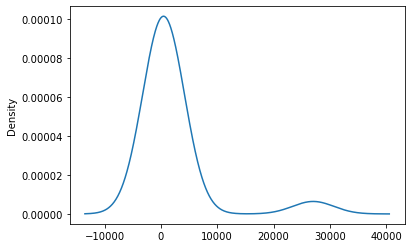

In [6]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE

application_df.APPLICATION_TYPE.value_counts().plot.density()
#application_df.APPLICATION_TYPE.value_counts(normalize = True).plot()

Classification

In [7]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE

application_df.CLASSIFICATION.value_counts()


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

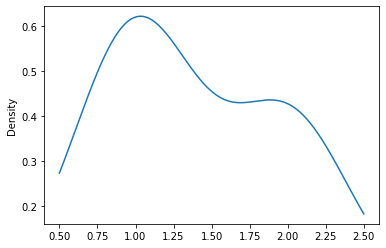

In [8]:
s = pd.Series(["C1", "C2", "C2", "C3", "C3", "C4", "C5"])
s.value_counts().plot.density()

In [9]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE

#application_df.CLASSIFICATION.value_counts().plot.density()
#application_df.CLASSIFICATION.value_counts().plot()

In [10]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [11]:
application_df.AFFILIATION.value_counts()[application_df.AFFILIATION.value_counts() > (0.05*application_df.AFFILIATION.value_counts().sum())]

Independent         18480
CompanySponsored    15705
Name: AFFILIATION, dtype: int64

<AxesSubplot:>

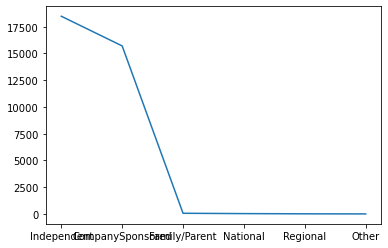

In [12]:
application_df.AFFILIATION.value_counts().plot()

<AxesSubplot:>

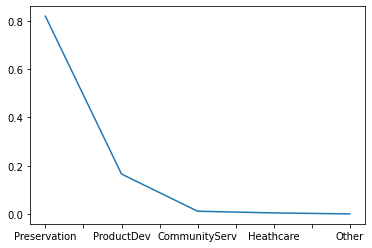

In [13]:
application_df.USE_CASE.value_counts(normalize= True).plot()

In [14]:
application_df.ORGANIZATION.value_counts()

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

<AxesSubplot:>

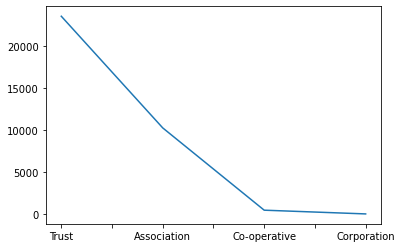

In [15]:
application_df.ORGANIZATION.value_counts().plot()

In [16]:
application_df.ASK_AMT.value_counts()[application_df.ASK_AMT.value_counts() > 0]

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [17]:
25398 - application_df.ASK_AMT.value_counts().sum()

-8901

<AxesSubplot:>

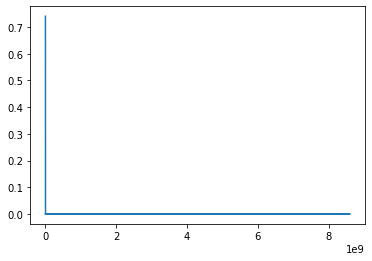

In [18]:
application_df.ASK_AMT.value_counts(normalize = True).plot()

In [19]:
application_df.ASK_AMT.value_counts().sort_index().to_frame().head(7)

,ASK_AMT
5000,25398
5001,1
5006,2
5016,1
5037,1
5040,1
5044,1


In [20]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

<AxesSubplot:>

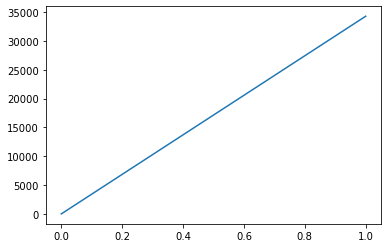

In [21]:
application_df.STATUS.value_counts().plot()

In [22]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

<AxesSubplot:>

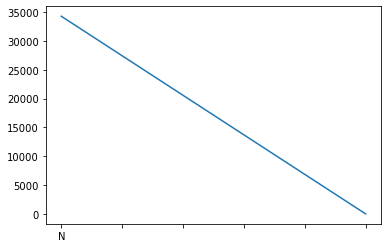

In [23]:
application_df.SPECIAL_CONSIDERATIONS.value_counts().plot()

<AxesSubplot:>

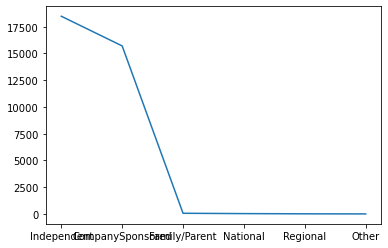

In [24]:
application_df.AFFILIATION.value_counts().plot()

In [25]:
application_df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

<AxesSubplot:ylabel='Density'>

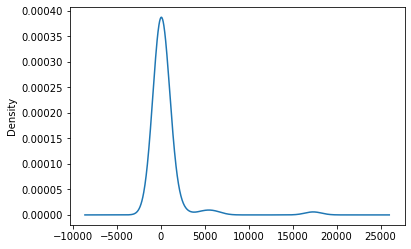

In [26]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE

application_df.CLASSIFICATION.value_counts().plot.density()
#application_df.CLASSIFICATION.value_counts().plot()

In [27]:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [28]:
application_df.USE_CASE.value_counts()[application_df.USE_CASE.value_counts() > (0.05*application_df.USE_CASE.value_counts().sum())]

Preservation    28095
ProductDev       5671
Name: USE_CASE, dtype: int64

In [29]:
application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() > (0.05*application_df.APPLICATION_TYPE.value_counts().sum())]

T3    27037
Name: APPLICATION_TYPE, dtype: int64

In [30]:
application_df.AFFILIATION.value_counts()[application_df.AFFILIATION.value_counts() > (0.05*application_df.AFFILIATION.value_counts().sum())]

Independent         18480
CompanySponsored    15705
Name: AFFILIATION, dtype: int64

In [31]:
application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() > (0.05*application_df.CLASSIFICATION.value_counts().sum())]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [32]:
application_df.ORGANIZATION.value_counts()[application_df.ORGANIZATION.value_counts() > (0.05*application_df.ORGANIZATION.value_counts().sum())]

Trust          23515
Association    10255
Name: ORGANIZATION, dtype: int64

In [33]:
application_df.STATUS.value_counts()[application_df.STATUS.value_counts() > (0.05*application_df.STATUS.value_counts().sum())]

1    34294
Name: STATUS, dtype: int64

In [34]:
application_df.INCOME_AMT.value_counts()[application_df.INCOME_AMT.value_counts() > (0.05*application_df.INCOME_AMT.value_counts().sum())]

0                24388
25000-99999       3747
100000-499999     3374
Name: INCOME_AMT, dtype: int64

In [35]:
application_df.SPECIAL_CONSIDERATIONS.value_counts()[application_df.SPECIAL_CONSIDERATIONS.value_counts() > (0.05*application_df.SPECIAL_CONSIDERATIONS.value_counts().sum())]

N    34272
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [36]:
application_df.ASK_AMT.value_counts()[application_df.ASK_AMT.value_counts() > (0.05*application_df.ASK_AMT.value_counts().sum())]

5000    25398
Name: ASK_AMT, dtype: int64

In [37]:
application_df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [38]:

application_df.ASK_AMT.value_counts()[application_df.ASK_AMT.value_counts() > (0.05*application_df.ASK_AMT.value_counts().sum())].index.to_list()

[5000]

In [39]:
# # ORGANIZATION value counts for binning
# #organization_values = application_df['ORGANIZATION'].value_counts()

# # Determine which values to replace if counts are less than 5% of sum
# replace_app_type = application_df.APPLICATION_TYPE.value_counts()[application_df.APPLICATION_TYPE.value_counts() > (0.05*application_df.APPLICATION_TYPE.value_counts().sum())]
# # replace_aff = application_df.AFFILIATION.value_counts()[application_df.AFFILIATION.value_counts() > (0.05*application_df.AFFILIATION.value_counts().sum())]
# replace_class = application_df.CLASSIFICATION.value_counts()[application_df.CLASSIFICATION.value_counts() > (0.05*application_df.CLASSIFICATION.value_counts().sum())]
# # replace_use_case = application_df.USE_CASE.value_counts()[application_df.USE_CASE.value_counts() > (0.05*application_df.USE_CASE.value_counts().sum())]
# # replace_org = application_df.ORGANIZATION.value_counts()[application_df.ORGANIZATION.value_counts() > (0.05*application_df.ORGANIZATION.value_counts().sum())]
# # replace_spec_con = application_df.SPECIAL_CONSIDERATIONS.value_counts()[application_df.SPECIAL_CONSIDERATIONS.value_counts() > (0.05*application_df.SPECIAL_CONSIDERATIONS.value_counts().sum())]
# # replace_status = application_df.STATUS.value_counts()[application_df.STATUS.value_counts() > (0.05*application_df.STATUS.value_counts().sum())]
# # replace_inc_amt = application_df.INCOME_AMT.value_counts()[application_df.INCOME_AMT.value_counts() > (0.05*application_df.INCOME_AMT.value_counts().sum())]
# replace_ask_amt = application_df.ASK_AMT.value_counts()[application_df.ASK_AMT.value_counts() > (0.05*application_df.ASK_AMT.value_counts().sum())].index.to_list()

# Replace in dataframe
for org in replace_app_type:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(org, 'Other')


# # # Replace in dataframe
# # for org in replace_aff:
# #     application_df.AFFILIATION = application_df.AFFILIATION.replace(org, 'Other')

# # Replace in dataframe
# for org in replace_class:
#     application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(org, 'Other')

# # Replace in dataframe
# # for org in replace_use_case:
# #     application_df.USE_CASE = application_df.USE_CASE.replace(org, 'Other')

# # # Replace in dataframe
# # for org in replace_org:
# #     application_df.ORGANIZATION = application_df.ORGANIZATION.replace(org, 'Other')

# # # Replace in dataframe
# # for org in replace_spec_con:
# #     application_df.SPECIAL_CONSIDERATIONS = application_df.SPECIAL_CONSIDERATIONS.replace(org, 'Other')

# # # Replace in dataframe
# # for org in replace_status:
# #     application_df.STATUS = application_df.STATUS.replace(org, 'Other')

# # # Replace in dataframe
# # for org in replace_inc_amt:
# #     application_df.INCOME_AMT = application_df.INCOME_AMT.replace(org, 'Other')

# Replace in dataframe
# for org in replace_ask_amt:
#     application_df.ASK_AMT = application_df.ASK_AMT.replace(org, 'Other')


In [40]:
application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = ['T9','T13','T12','T2','T25','T14','T29','T15','T17']

In [41]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()


T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [42]:
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x>1] 

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [43]:
classifications_to_replace = application_df['CLASSIFICATION'].value_counts()

In [44]:
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [45]:
temp = application_df.drop(columns = ["ASK_AMT"])


#"ASK_AMT" "INCOME_AMT

In [46]:


# Generate the categorical variable list
application_cat = temp.dtypes[temp.dtypes == "object"].index.tolist()



In [47]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)



In [48]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = pd.get_dummies(application_df.drop(application_cat, 1))

C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
# Split the preprocessed data into features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'], 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



C:\Users\IanAK\miniconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [51]:
number_input_features = len(X_train[0])
number_input_features

8854

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 5
hidden_nodes_layer2 = 10
hidden_nodes_layer3 = 3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='elu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='exponential'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='gelu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='hard_sigmoid'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='linear'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='selu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='softmax'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='softplus'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='swish'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))







# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 44275     
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 44,372
Trainable params: 44,372
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [54]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs('optimized_checkpoints/', exist_ok=True)
checkpoint_path = 'optimized_checkpoints/weights.{epoch:02d}.hdf5'

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    #verbose=1,
    save_weights_only=True,
    save_freq=4000)



In [55]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=10, callbacks=[cp_callback])

Epoch 1/10
804/804 [==============================] - 6s 4ms/step - loss: 0.6538 - accuracy: 0.6255
Epoch 2/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5931 - accuracy: 0.7280
Epoch 3/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5713 - accuracy: 0.7357
Epoch 4/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5583 - accuracy: 0.7415
Epoch 5/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5462 - accuracy: 0.7507
Epoch 6/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5322 - accuracy: 0.7710
Epoch 7/10
804/804 [==============================] - 3s 4ms/step - loss: 0.5130 - accuracy: 0.7889
Epoch 8/10
804/804 [==============================] - 3s 3ms/step - loss: 0.4954 - accuracy: 0.7928
Epoch 9/10
804/804 [==============================] - 3s 4ms/step - loss: 0.4856 - accuracy: 0.7930
Epoch 10/10
804/804 [==============================] - 3s 4ms/step - loss: 0.4790 - accuracy: 0.7939

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=1)
print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')



268/268 [==============================] - 1s 3ms/step - loss: 0.9107 - accuracy: 0.5050
Loss: 0.9107497930526733, Accuracy: 0.5049562454223633


In [57]:
# Export our model to HDF5 file
# nn_new.save("AlphabetSoupCharity.Optimzation.h5")